In [13]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from scipy.linalg import svd

In [6]:
cd data

c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\data


In [7]:
fields = ['app_name', 'author.steamid']

data = pd.read_csv('steam_positive_reviews-ENGLISH.csv', skipinitialspace=True, usecols=fields)

data= data.rename(columns={'app_name': 'game_name', 'author.steamid': 'reviewer_id'})

data = data[['reviewer_id','game_name']]

In [8]:
data

,reviewer_id,game_name
0,76561199054755373,The Witcher 3: Wild Hunt
1,76561198170193529,The Witcher 3: Wild Hunt
2,76561198119302812,The Witcher 3: Wild Hunt
3,76561198065591528,The Witcher 3: Wild Hunt
4,76561198996835044,The Witcher 3: Wild Hunt
...,...,...
8584439,76561198817267089,Half-Life: Alyx
8584440,76561197967033932,Half-Life: Alyx
8584441,76561198046495482,Half-Life: Alyx
8584442,76561198176379749,Half-Life: Alyx


In [8]:
user_game_mat= pd.DataFrame(int(0),index=set(data.reviewer_id), columns=set(data.game_name))

In [37]:
user_game_mat

,Arma 3,Half-Life: Alyx,Avorion,The End Is Nigh,ARK: Survival Evolved,Devil May Cry HD Collection,Duck Game,"Warhammer 40,000: Mechanicus",Europa Universalis IV,RollerCoaster Tycoon World,...,Salt and Sanctuary,DRAGON QUEST HEROES™ II,Farm Manager 2018,Banished,Thief Simulator,三国群英传8 Heroes of the Three Kingdoms 8,"Papers, Please",NBA 2K19,Black Desert Online,Saints Row: The Third
76561198195146753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197960265730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198086094850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198119649282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198010597383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76561197993820150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198849458170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197977042939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198404861950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
reviewers, games= data.reviewer_id, data.game_name

In [11]:
for r, g in zip(reviewers,games):
    try:
        user_game_mat.loc[int(r),g] = int(1)
    except:
        continue

In [12]:
del data, reviewers, games

In [10]:
import numpy as np

In [40]:
user_game_mat

,Arma 3,Half-Life: Alyx,Avorion,The End Is Nigh,ARK: Survival Evolved,Devil May Cry HD Collection,Duck Game,"Warhammer 40,000: Mechanicus",Europa Universalis IV,RollerCoaster Tycoon World,...,Salt and Sanctuary,DRAGON QUEST HEROES™ II,Farm Manager 2018,Banished,Thief Simulator,三国群英传8 Heroes of the Three Kingdoms 8,"Papers, Please",NBA 2K19,Black Desert Online,Saints Row: The Third
76561198195146753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197960265730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198086094850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76561198119649282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198010597383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76561197993820150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198849458170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197977042939,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198404861950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
user_game_mat_sample= user_game_mat.iloc[:int(4905094/200),:]

In [34]:
sum(user_game_mat["Arma 3"])

81497

In [15]:
temp= user_game_mat.iloc[:,np.r_[0:10, 15:17, 35]]

In [16]:
for s in temp:
    print(sum(temp[str(s)]))

13706
14699
6186
88386
19370
4506
24612
25586
738
2458
35597
406
10141


In [27]:
del temp

In [26]:
U, Sigma, VT = svd(user_game_mat_sample)

C:\Users\user\AppData\Local\Temp/ipykernel_3796/3648446502.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


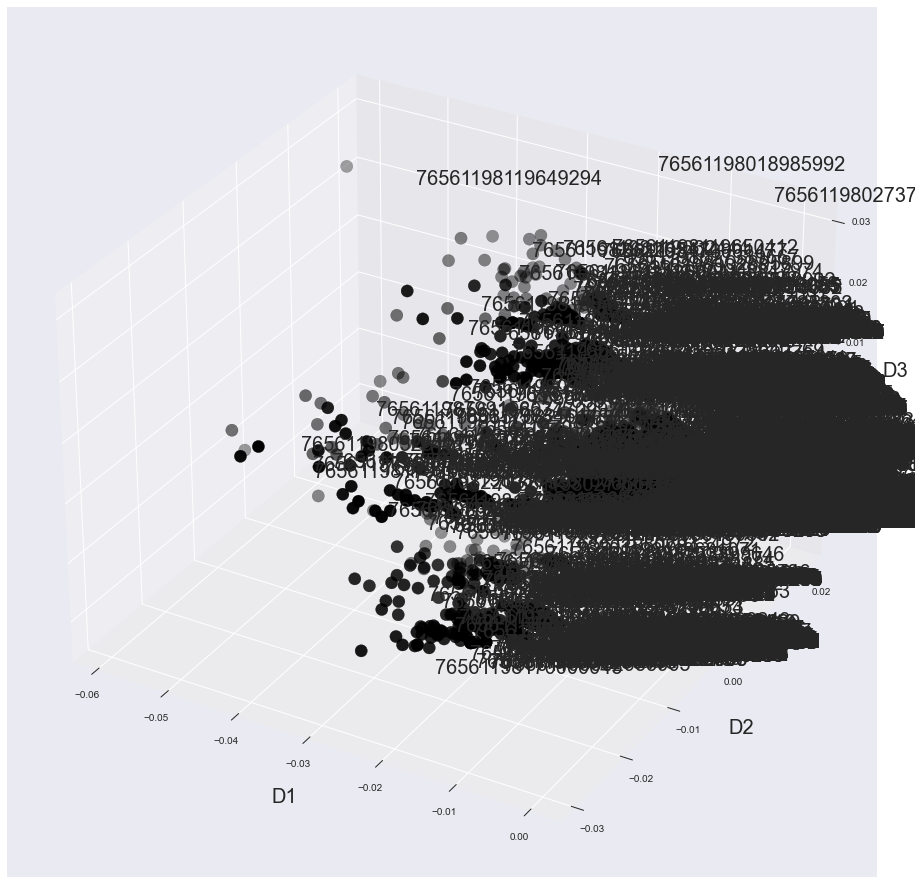

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn')

fig = plt.figure(figsize=(20,16))
ax = fig.gca(projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,2],c='k',s=150);
ax.set_xlabel("D1", fontsize=20, labelpad=20)
ax.set_ylabel("D2", fontsize=20, labelpad=20)
ax.set_zlabel("D3", fontsize=20, labelpad=20);

lbls = user_game_mat_sample.index
offset = 0.01
for i, txt in enumerate(lbls):
    if i not in [6,7]:
        ax.text(U[i,0]+offset,U[i,1],U[i,2],txt, fontsize=20)
    else:
        ax.text(U[i,0]+offset,U[i,1],U[i,2]+5*offset,txt, fontsize=20)

C:\Users\user\AppData\Local\Temp/ipykernel_3796/2898067712.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 40857 (\N{CJK UNIFIED IDEOGRAPH-9F99}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23830 (\N{CJK UNIFIED IDEOGRAPH-5D16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\T5\PROJECT\game-revi

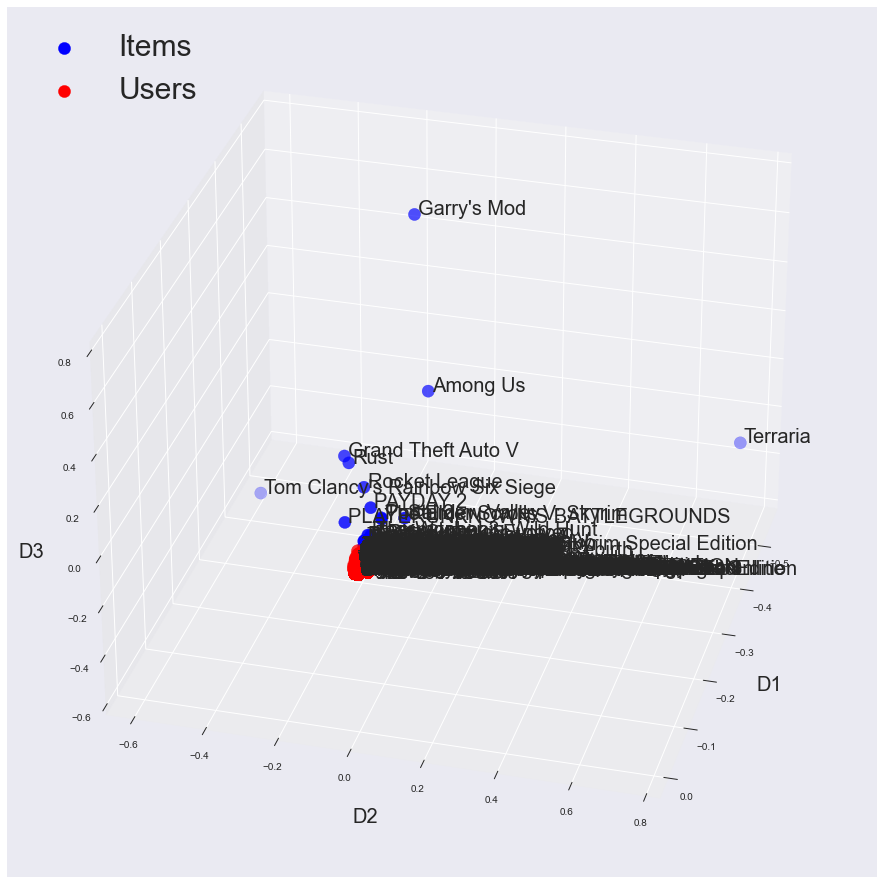

In [29]:
fig = plt.figure(figsize=(20,16))
ax = fig.gca(projection='3d')
ax.scatter(VT.T[:,0],VT.T[:,1],VT.T[:,2],c='b',s=150, label="Items");
ax.scatter(U[:,0],U[:,1],U[:,2],c='r',s=150, label="Users");
ax.set_xlabel("D1", fontsize=20, labelpad=20)
ax.set_ylabel("D2", fontsize=20, labelpad=20)
ax.set_zlabel("D3", fontsize=20, labelpad=20);

lbls = user_game_mat_sample.columns
item_offset = 0.01
for i, txt in enumerate(lbls):
    if i not in [6,7]:
        ax.text(VT.T[i,0],VT.T[i,1]+item_offset,VT.T[i,2],txt, fontsize=20)
    else:
        ax.text(VT.T[i,0],VT.T[i,1]+item_offset,VT.T[i,2]+5*item_offset,txt, fontsize=20)

lbls = user_game_mat_sample.index
offset = 0.01
for i, txt in enumerate(lbls):
    if i not in [6,7]:
        ax.text(U[i,0],U[i,1]+offset,U[i,2],txt, fontsize=20)
    else:
        ax.text(U[i,0],U[i,1]+offset,U[i,2]+6*offset,txt, fontsize=20)
ax.view_init(30,15)
plt.legend(loc="upper left", fontsize=30);

In [31]:
compare_item = 2
for item in range(10):
    if item != compare_item:
        print("Item %s & %s: "%(compare_item,item), np.dot(VT.T[compare_item],VT.T[item]))

Item 2 & 0:  5.16811329415699e-17
Item 2 & 1:  2.3959735105362695e-16
Item 2 & 3:  -4.283542228960543e-17
Item 2 & 4:  3.0859316092605484e-17
Item 2 & 5:  -3.1390977497773326e-16
Item 2 & 6:  -1.432803875883932e-16
Item 2 & 7:  1.3615207594165624e-16
Item 2 & 8:  4.2330683297270455e-17
Item 2 & 9:  -1.2599191573934114e-17
